# Pymaceuticals Inc.
---

### Analysis

#### -There is a postitive correlation between the weight of the mice and the tumor size with a r value of 0.84.
#### -Capomulin and Ramicane came up top as the most effective at reducing tumor sizes.
#### -The least effective were the bottom two drugs Infubinol and Ceftamin.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
merged_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
tot_mice = merged_df['Mouse ID'].nunique()
tot_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouseID = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
duplicate_mouseID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_data = merged_df.loc[merged_df["Mouse ID"] == "g989", :]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_df[merged_df['Mouse ID'].isin(duplicate_mouseID)==False]
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_miceCount = clean_df["Mouse ID"].nunique()
clean_miceCount

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
regimen_mean = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem = clean_df.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary DataFrame.
summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": regimen_mean,
    "Median Tumor Volume": regimen_median,
    "Tumor Volume Variance": regimen_var,
    "Tumor Volume Standard Deviation": regimen_std,
    "Tumor Volume Standard Error ": regimen_sem
})
summary_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_aggregation =  clean_df.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_aggregation

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Mouse Timepoints for Each Drug Regimen')

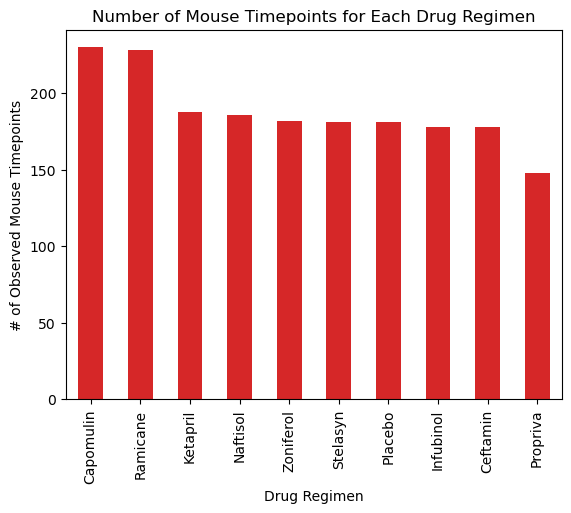

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
num_mice_tested = clean_df["Drug Regimen"].value_counts()
panda_barChart = num_mice_tested.plot.bar(color='tab:red')

#Axis Labels
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Number of Mouse Timepoints for Each Drug Regimen")

Text(0.5, 1.0, 'Number of Mouse Timepoints for Each Drug Regimen')

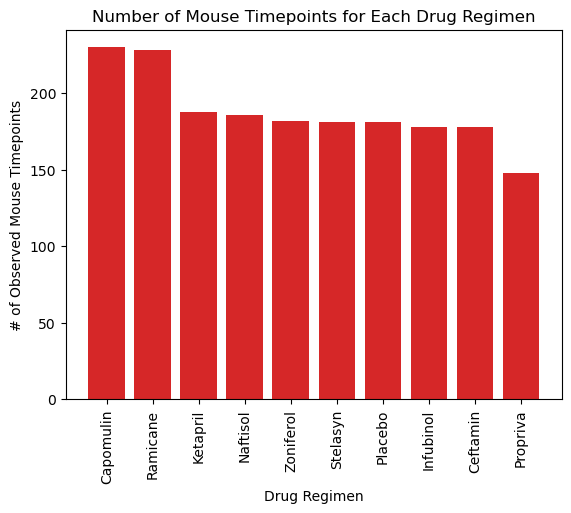

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = num_mice_tested.index.values
y_axis = num_mice_tested.values
plt.bar(x_axis, y_axis, color='tab:red')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation='vertical')
plt.title("Number of Mouse Timepoints for Each Drug Regimen")

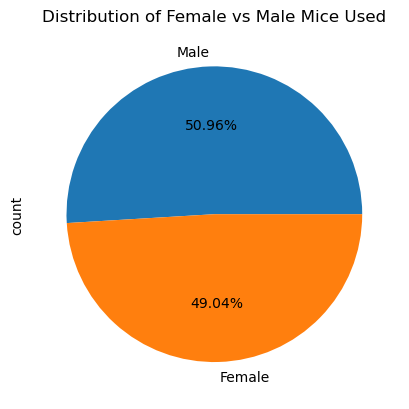

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
sex_data = clean_df["Sex"].value_counts()

# Make the pie chart
sex_data.plot.pie(autopct="%1.2f%%")
plt.title("Distribution of Female vs Male Mice Used")
plt.show()

In [12]:
sex_data

Sex
Male      958
Female    922
Name: count, dtype: int64

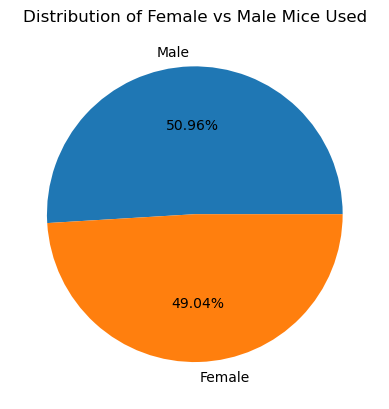

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
labels = ['Male', 'Female']
sizes = [sex_data['Male'], sex_data['Female']]
# Get the unique mice with their gender


# Make the pie chart
plt.pie(sizes, labels=labels, autopct='%1.2f%%')
plt.title("Distribution of Female vs Male Mice Used")
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_tp_df = pd.DataFrame(merged_df.groupby("Mouse ID")["Timepoint"].max().sort_values()).reset_index().rename(columns= {'Timepoint':'max_tp'})
max_tp_df
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_vol_max_tp_df = pd.merge(merged_df, max_tp_df, on='Mouse ID')
tumor_vol_max_tp_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g),max_tp
0,b128,0,45.000000,0,Capomulin,Female,9,22,45
1,f932,0,45.000000,0,Ketapril,Male,15,29,0
2,g107,0,45.000000,0,Ketapril,Female,2,29,35
3,a457,0,45.000000,0,Ketapril,Female,11,30,10
4,c819,0,45.000000,0,Ketapril,Male,21,25,40
...,...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25,45
1889,u364,45,31.023923,3,Capomulin,Male,18,17,45
1890,p438,45,61.433892,1,Ceftamin,Female,11,26,45
1891,x773,45,58.634971,4,Placebo,Female,21,30,45


In [26]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
treatment_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
for treatment in treatments:
    df = tumor_vol_max_tp_df.loc[tumor_vol_max_tp_df['Drug Regimen']== treatment]
    final_vol_df = df.loc[df['Timepoint']==df['max_tp']]
    values = final_vol_df['Tumor Volume (mm3)']
    treatment_values.append(values)
    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = (values.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bound)|
                                       (final_vol_df['Tumor Volume (mm3)'] <= lower_bound)])
    
    print(f'{treatment} potential outliers: {outliers}')



Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 420    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


{'whiskers': [<matplotlib.lines.Line2D at 0x140bf9880>,
 'caps': [<matplotlib.lines.Line2D at 0x140bf9e20>,
 'boxes': [<matplotlib.lines.Line2D at 0x140a94ce0>,
 'medians': [<matplotlib.lines.Line2D at 0x140bfa3c0>,
 'fliers': [<matplotlib.lines.Line2D at 0x140bfa690>,
 'means': []}

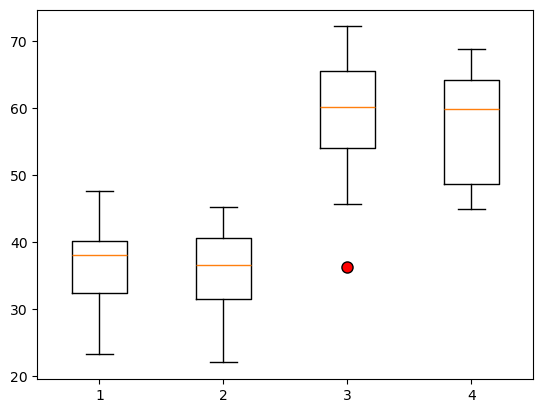

In [27]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
    #Edit outliers on boxplot 
flierprops = dict(marker='o', markerfacecolor = 'r', markersize= 8, markeredgecolor='black')

plt.boxplot(treatment_values, flierprops=flierprops)


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse j246')

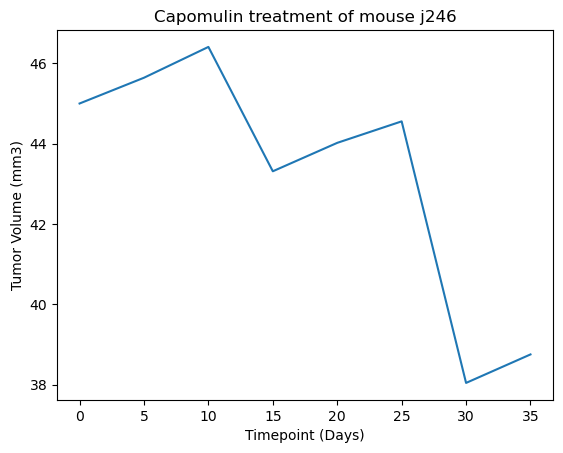

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Choose a mouse treated with Capomulin j246
mouse = merged_df.loc[merged_df["Mouse ID"]== 'j246']
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'])
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse j246")

In [36]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
#Get Capomulin data
campomulin_data = clean_df.loc[clean_df['Drug Regimen']== 'Capomulin']
campomulin_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [40]:
#Caluclate avg values for volume and weight
avg_campomulin_data = campomulin_data.groupby("Mouse ID")[["Tumor Volume (mm3)", "Weight (g)"]].mean()
avg_campomulin_data

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22.0
b742,40.083699,21.0
f966,36.505973,17.0
g288,41.990097,19.0
g316,44.613344,22.0
i557,44.805810,24.0
i738,39.141053,20.0
j119,44.465236,23.0
j246,43.216925,21.0


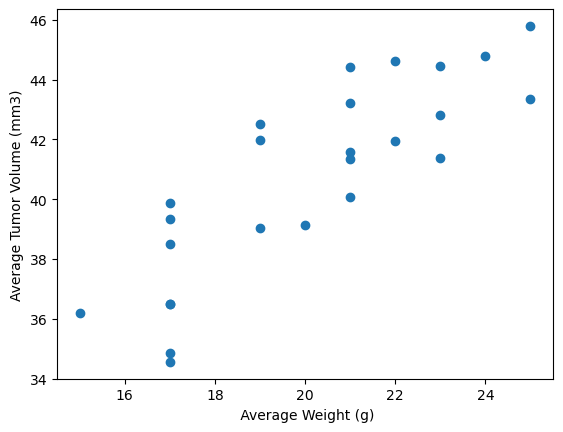

In [42]:
#Create scatter plot
x = avg_campomulin_data["Weight (g)"]
y = avg_campomulin_data["Tumor Volume (mm3)"]

plt.scatter(x, y)
plt.xlabel(" Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

In [47]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_coef = st.pearsonr(x,y)
print(f'The correlation between mouse weight and average tumor volume is {round(corr_coef[0],2)}')

The correlation between mouse weight and average tumor volume is 0.84


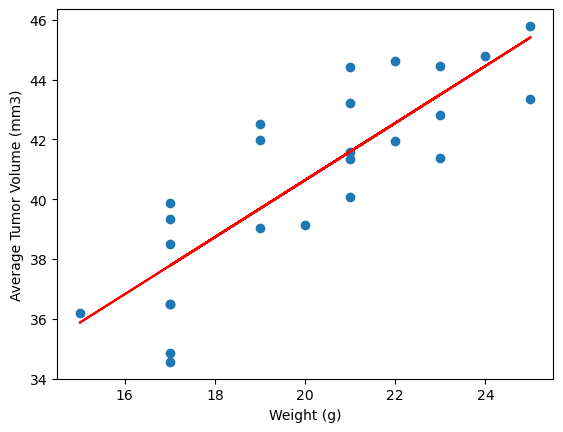

In [ ]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x,y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept, 2)) 

plt.scatter(x,y)
plt.plot(x, regress_values, "r-")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()